In [1]:
# Install Libraries
!pip3 install textblob
!pip3 install tweepy

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


In [3]:
!pip3 install pycountry

    100% |████████████████████████████████| 10.1MB 100kB/s ta 0:00:01   93% |██████████████████████████████  | 9.5MB 1.1MB/s eta 0:00:01    94% |██████████████████████████████▎ | 9.6MB 916kB/s eta 0:00:01
  Running setup.py bdist_wheel for pycountry ... done
  Stored in directory: /home/adarsh/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [5]:
!pip3 install langdetect

    100% |████████████████████████████████| 983kB 512kB/s ta 0:00:01
  Running setup.py bdist_wheel for langdetect ... done
  Stored in directory: /home/adarsh/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "h3zGCwHNNXXUX91mUDSsAM1OP"
consumerSecret = "lwefMUHioQczOKO6sQFZu4sauoEGo5UmThZMyxiBEyzSLRme92"
accessToken = "2449936593-bWm5H0UhkDyWu5T9SZ8cNHgZ1AQ80Z3A4wz8cJz"
accessTokenSecret = "AOQ4VXDC9AhK3Bi7BdCqOylck7Iz2POKpjhI33AU5QwfC"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: israel
Please enter how many tweets to analyze: 100


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  22
negative number:  48
neutral number:  30
total number:  100
positive number:  22
negative number:  48
neutral number:  30


In [6]:
tweet_list

,0
0,RT @MiddleEastEye: Israel-Palestine: The names...
1,RT @IsraeleRodolffo: Cês tão preparados pra ho...
2,RT @Guide_en_Israel: En direct d'#Israel! Avec...
3,RT @jeongwoozz: i urge everyone to keep rt-ing...
4,RT @jeongwoozz: i urge everyone to keep rt-ing...
...,...
95,@sandipsabharwal @CMOMaharashtra It is atleast...
96,12 🇷🇸 Serbia\n10 🇨🇾 Chipre\n8 🇫🇷 Francia\n7 🇲🇹...
97,RT @Jana_Shah: @biannagolodryga Hey @biannago...
98,RT @mattdpearce: “They told me that I violated...


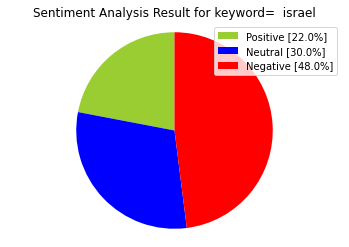

In [7]:
#Creating PieChart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MiddleEastEye: Israel-Palestine: The names...,RT @MiddleEastEye: Israel-Palestine: The names...
1,RT @IsraeleRodolffo: Cês tão preparados pra ho...,RT @IsraeleRodolffo: Cês tão preparados pra ho...
2,RT @Guide_en_Israel: En direct d'#Israel! Avec...,RT @Guide_en_Israel: En direct d'#Israel! Avec...
3,RT @jeongwoozz: i urge everyone to keep rt-ing...,RT @jeongwoozz: i urge everyone to keep rt-ing...
5,RT @emilia_suze: No surprise here Ignorant ps...,RT @emilia_suze: No surprise here Ignorant ps...
...,...,...
93,RT @_safiamahmood: I am really looking forward...,RT @_safiamahmood: I am really looking forward...
95,@sandipsabharwal @CMOMaharashtra It is atleast...,@sandipsabharwal @CMOMaharashtra It is atleast...
96,12 🇷🇸 Serbia\n10 🇨🇾 Chipre\n8 🇫🇷 Francia\n7 🇲🇹...,12 🇷🇸 Serbia\n10 🇨🇾 Chipre\n8 🇫🇷 Francia\n7 🇲🇹...
97,RT @Jana_Shah: @biannagolodryga Hey @biannago...,RT @Jana_Shah: @biannagolodryga Hey @biannago...


In [10]:
tweet_list

,0,text
0,RT @MiddleEastEye: Israel-Palestine: The names...,RT @MiddleEastEye: Israel-Palestine: The names...
1,RT @IsraeleRodolffo: Cês tão preparados pra ho...,RT @IsraeleRodolffo: Cês tão preparados pra ho...
2,RT @Guide_en_Israel: En direct d'#Israel! Avec...,RT @Guide_en_Israel: En direct d'#Israel! Avec...
3,RT @jeongwoozz: i urge everyone to keep rt-ing...,RT @jeongwoozz: i urge everyone to keep rt-ing...
5,RT @emilia_suze: No surprise here Ignorant ps...,RT @emilia_suze: No surprise here Ignorant ps...
...,...,...
93,RT @_safiamahmood: I am really looking forward...,RT @_safiamahmood: I am really looking forward...
95,@sandipsabharwal @CMOMaharashtra It is atleast...,@sandipsabharwal @CMOMaharashtra It is atleast...
96,12 🇷🇸 Serbia\n10 🇨🇾 Chipre\n8 🇫🇷 Francia\n7 🇲🇹...,12 🇷🇸 Serbia\n10 🇨🇾 Chipre\n8 🇫🇷 Francia\n7 🇲🇹...
97,RT @Jana_Shah: @biannagolodryga Hey @biannago...,RT @Jana_Shah: @biannagolodryga Hey @biannago...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MiddleEastEye: Israel-Palestine: The names...,israel palestine the names of palestinians a...
1,RT @IsraeleRodolffo: Cês tão preparados pra ho...,c s t o preparados pra hoje daqui a pouco a ...
2,RT @Guide_en_Israel: En direct d'#Israel! Avec...,en direct d israel avec un cessez le feu ap...
3,RT @jeongwoozz: i urge everyone to keep rt-ing...,i urge everyone to keep rt ing and tweet the ...
5,RT @emilia_suze: No surprise here Ignorant ps...,no surprise here ignorant pseudo reporter ...
6,RT @ajplus: UPDATE: Israeli police wounded at ...,update israeli police wounded at least 20 pa...
7,I pray earnestly that crisis in the Middle Eas...,i pray earnestly that crisis in the middle eas...
8,RT @nivayautszyan: Chinese in China are so div...,chinese in china are so divided towards israe...
9,"RT @AJEnglish: Gaza has “significant trauma"" a...",gaza has significant trauma and medical nee...
10,RT @funlovinginfid1: It's time to fight back a...,it s time to fight back against the mobs i...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MiddleEastEye: Israel-Palestine: The names...,israel palestine the names of palestinians a...,-0.200000,0.00000,negative,0.462,0.538,0.000,-0.8625
1,RT @IsraeleRodolffo: Cês tão preparados pra ho...,c s t o preparados pra hoje daqui a pouco a ...,0.000000,0.00000,neutral,0.000,1.000,0.000,0.0000
2,RT @Guide_en_Israel: En direct d'#Israel! Avec...,en direct d israel avec un cessez le feu ap...,0.100000,0.40000,neutral,0.000,1.000,0.000,0.0000
3,RT @jeongwoozz: i urge everyone to keep rt-ing...,i urge everyone to keep rt ing and tweet the ...,0.000000,0.00000,negative,0.129,0.871,0.000,-0.5267
5,RT @emilia_suze: No surprise here Ignorant ps...,no surprise here ignorant pseudo reporter ...,0.000000,1.00000,negative,0.317,0.588,0.095,-0.5994
6,RT @ajplus: UPDATE: Israeli police wounded at ...,update israeli police wounded at least 20 pa...,-0.300000,0.40000,negative,0.167,0.833,0.000,-0.5574
7,I pray earnestly that crisis in the Middle Eas...,i pray earnestly that crisis in the middle eas...,0.000000,0.00000,negative,0.175,0.726,0.098,-0.4215
8,RT @nivayautszyan: Chinese in China are so div...,chinese in china are so divided towards israe...,0.250000,0.25000,negative,0.171,0.829,0.000,-0.3612
9,"RT @AJEnglish: Gaza has “significant trauma"" a...",gaza has significant trauma and medical nee...,0.252841,0.56875,negative,0.130,0.787,0.083,-0.2500
10,RT @funlovinginfid1: It's time to fight back a...,it s time to fight back against the mobs i...,0.000000,0.00000,negative,0.167,0.833,0.000,-0.3818


In [14]:
dataset=[]
for index, row in tw_list['text'].iteritems():
        dataset.append((tw_list.loc[index,'text'],tw_list.loc[index,'sentiment']))
print(dataset[1:5])        

[(' c s t o preparados pra hoje  daqui a pouco a gente confirma aqui umas participa  es especiais  que v o cantar com noix ', 'neutral'), (' en direct d  israel  avec un cessez le feu apr s 11 jours de guerre    shabbat shalom   tous      am israel hai        ', 'neutral'), (' i urge everyone to keep rt ing and tweet the hashtags so that the world know it was israel who violated the truce   you don ', 'negative'), (' no surprise here  ignorant pseudo reporter   has a history of misleading canadians  then again he only reports what ', 'negative')]


In [27]:
dataset_train=dataset[1:round(0.9*len(dataset))]
dataset_test=dataset[round(0.9*len(dataset))+1:-1]

In [28]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(dataset_train)

In [29]:
cl.accuracy(dataset_test)

0.6666666666666666

In [32]:
dataset_train=dataset[1:round(0.8*len(dataset))]
dataset_test=dataset[round(0.8*len(dataset))+1:-1]

In [33]:
from textblob.classifiers import DecisionTreeClassifier
dt = DecisionTreeClassifier(dataset_train)

In [34]:
cl.accuracy(dataset_test)

0.7857142857142857

In [26]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [27]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [28]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,37,41.57
positive,36,40.45
negative,16,17.98


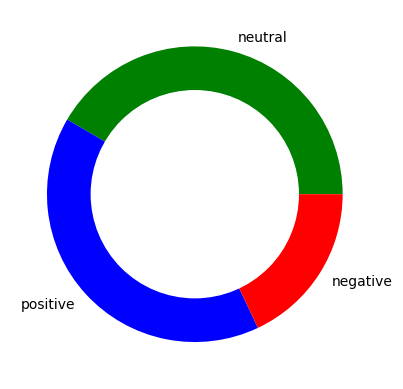

In [31]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [34]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


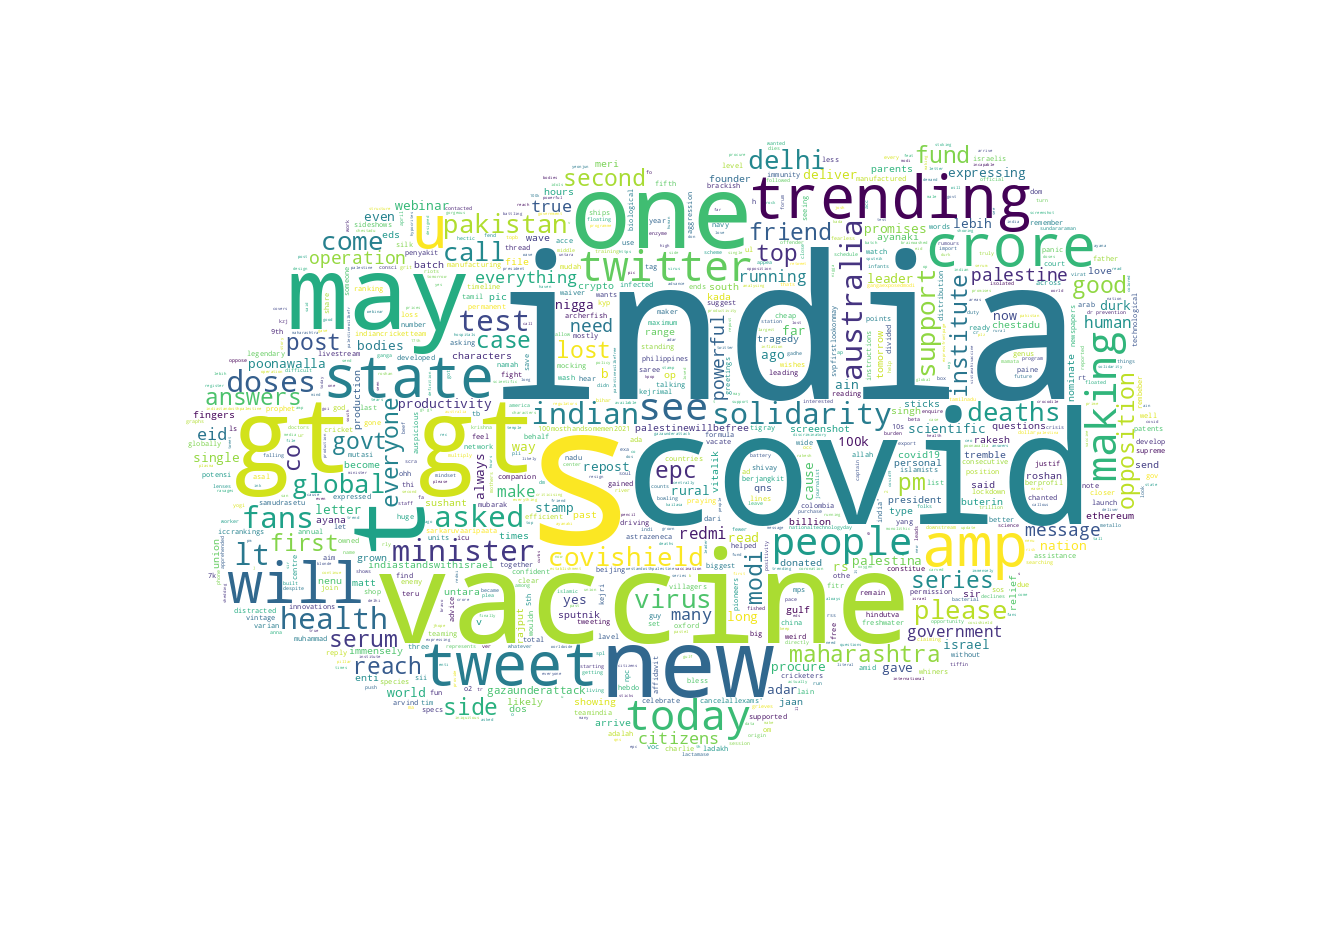

In [35]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


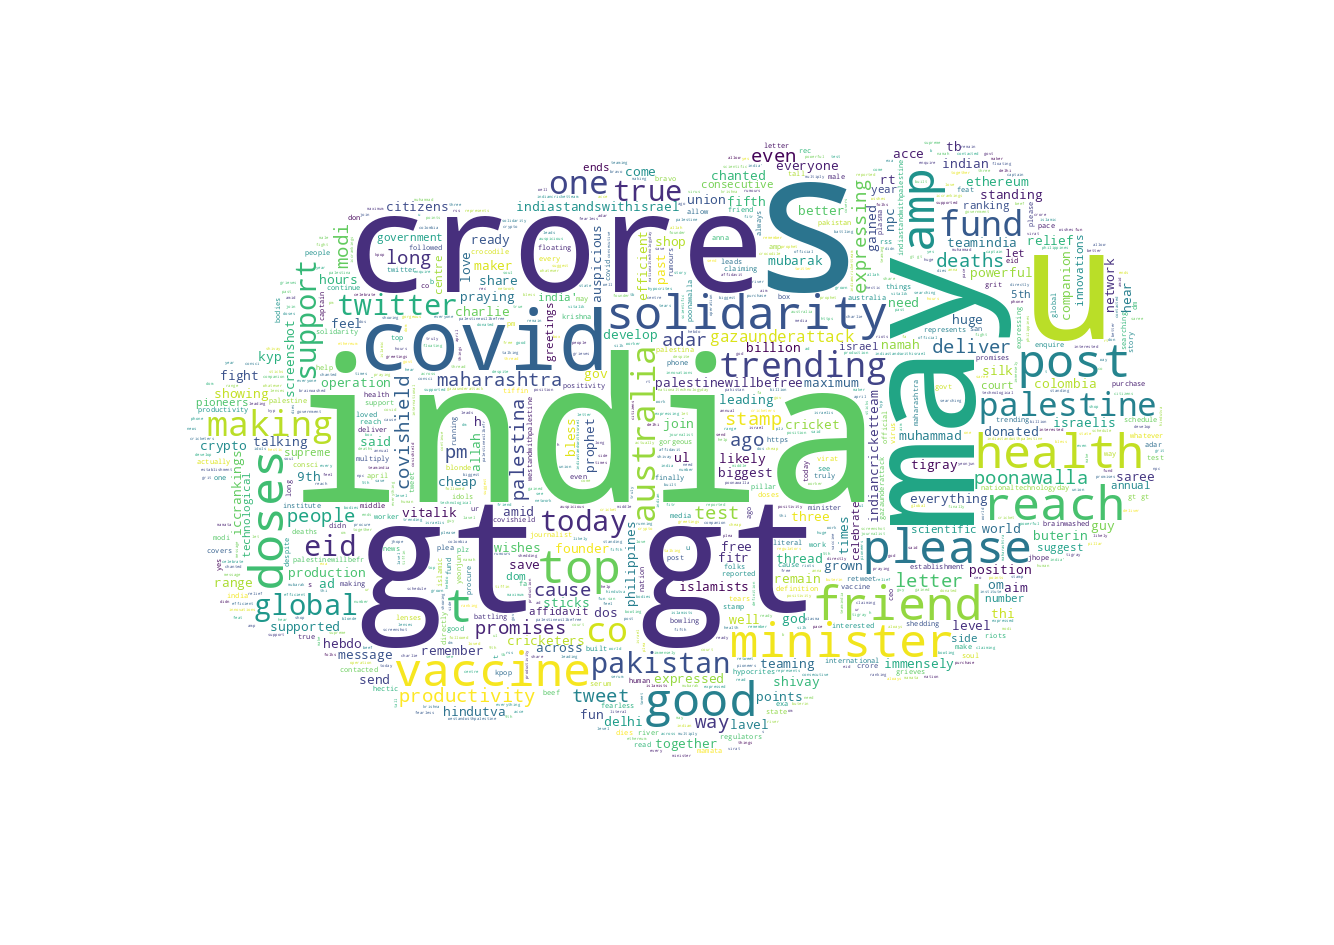

In [36]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


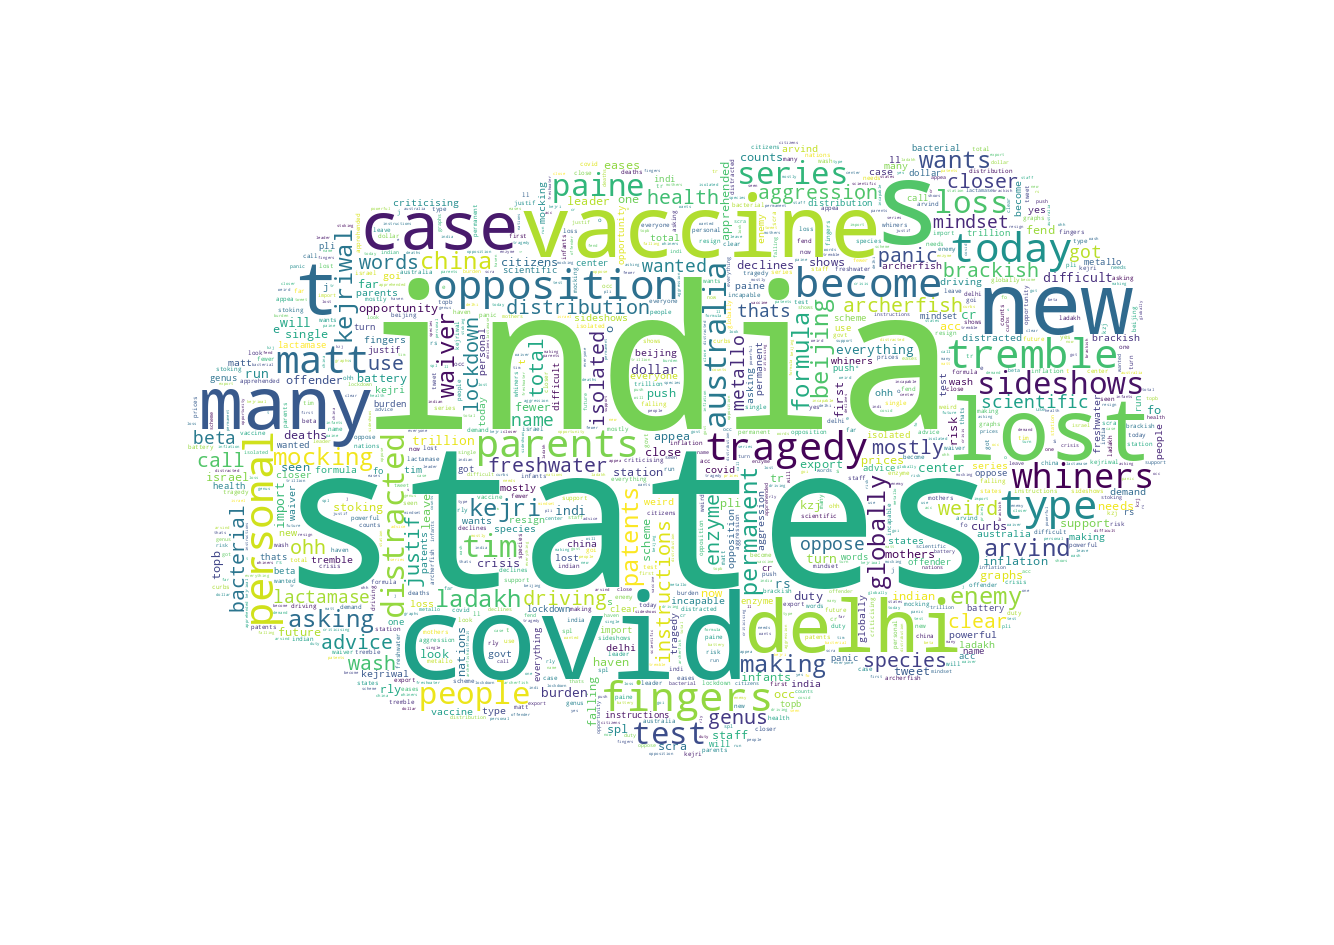

In [37]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [38]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [39]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,112.38
neutral,93.78
positive,114.28


In [40]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.56
neutral,13.54
positive,18.39
